In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('C:/Users/hp/Desktop/elevvo pathway Internship/Tasks/Customer_Segmentation/Data/Mall_Customers_processed.csv')

In [6]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

inertia

[800.0,
 597.9472937932279,
 494.80375001304566,
 395.39209034797966,
 351.7432061711911,
 277.38974019851906,
 251.1548491119017,
 211.98576294959307,
 185.72807688711416,
 152.0298342977569]

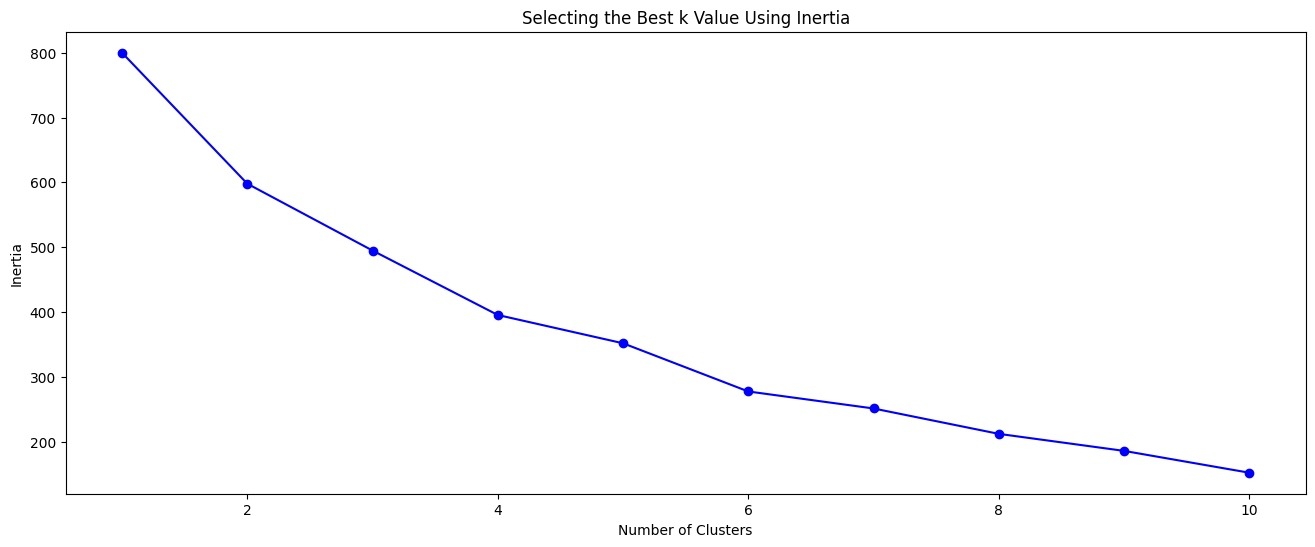

In [7]:
plt.figure(figsize=(16, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Selecting the Best k Value Using Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

df.head()

Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  1.128152 -1.424569           -1.738999               -0.434801        2
1  1.128152 -1.281035           -1.738999                1.195704        2
2 -0.886405 -1.352802           -1.700830               -1.715913        0
3 -0.886405 -1.137502           -1.700830                1.040418        2
4 -0.886405 -0.563369           -1.662660               -0.395980        0

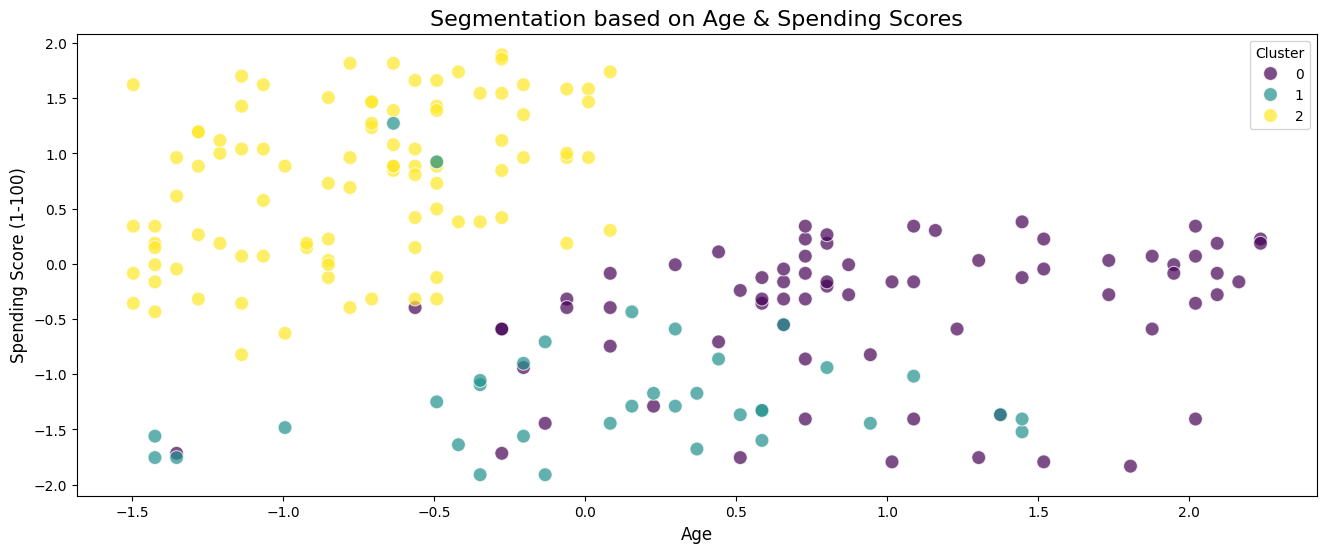

In [9]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Segmentation based on Age & Spending Scores', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Cluster')
plt.show()

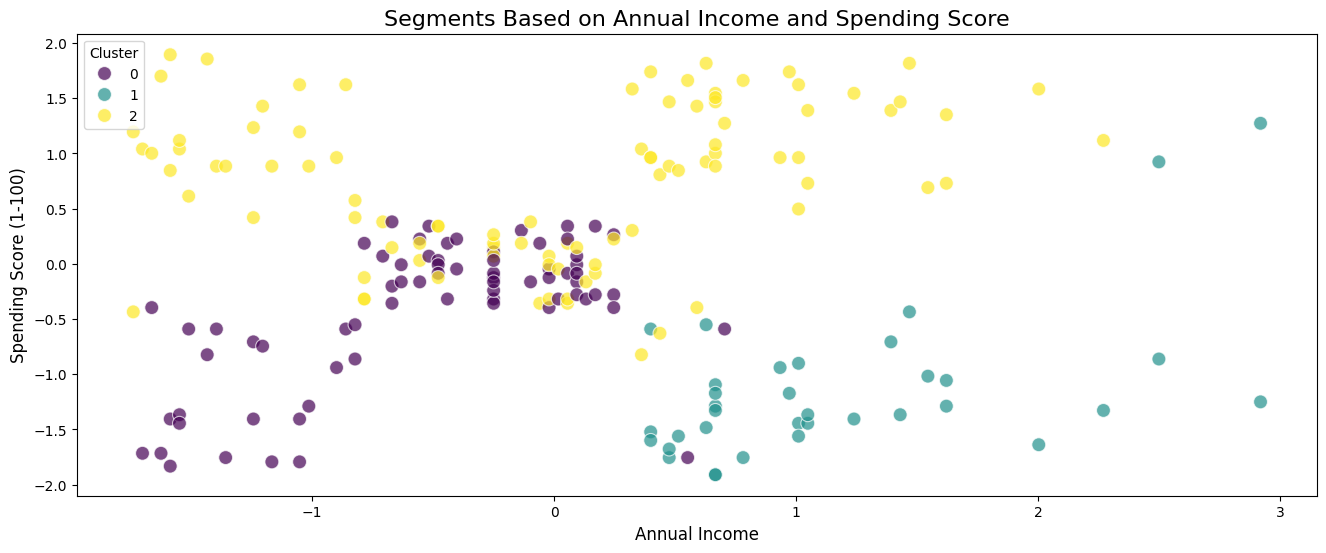

In [10]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Segments Based on Annual Income and Spending Score', fontsize=16)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Cluster')
plt.show()

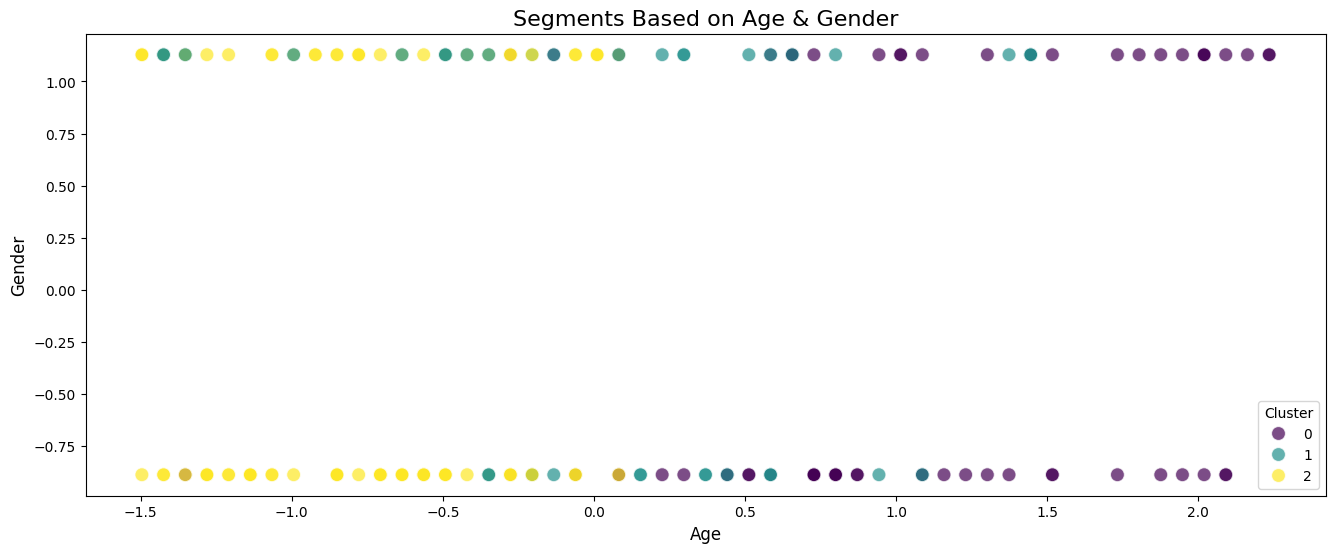

In [11]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Age', y='Gender', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Segments Based on Age & Gender', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.legend(title='Cluster')
plt.show()

In [13]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(df)
    score = silhouette_score(df, preds)
    print(f"For k = {k}, Silhouette Score = {score}")

For k = 2, Silhouette Score = 0.3433334279023914
For k = 3, Silhouette Score = 0.3255894289544697
For k = 4, Silhouette Score = 0.34498273542781305
For k = 5, Silhouette Score = 0.3739603863805545
For k = 6, Silhouette Score = 0.3574798957440945
For k = 7, Silhouette Score = 0.3491489238712714
For k = 8, Silhouette Score = 0.3996126149612164
For k = 9, Silhouette Score = 0.39550846980630966
For k = 10, Silhouette Score = 0.4105372214839453
